In [27]:
!pip install transformers
!pip install transformers_interpret
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import transformers
import transformers_interpret
import torch
from torch.utils.data import Dataset, DataLoader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.9 MB/s eta 0:00:00


<BarContainer object of 4 artists>

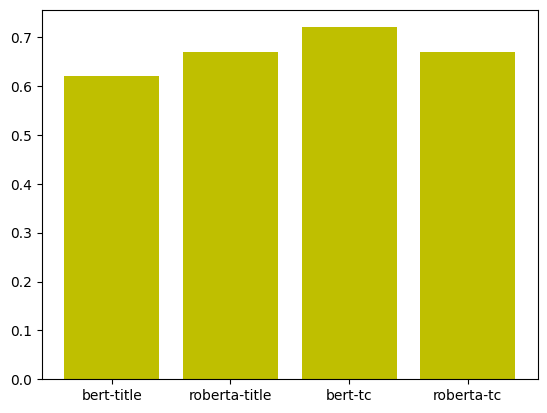

In [2]:
models = ['bert-title', 'roberta-title', 'bert-tc', 'roberta-tc']
test_acc = [0.62, 0.67, 0.72, 0.67]
train_acc = [0.50, 0.58, 0.56, 0.62]

# d = pd.DataFrame(
#     {'models' : models,
#      'train_acc': train_acc,
#       'test_acc': test_acc
#     }
# )

# d.plot(kind='bar', stacked=True)
# plt.bar(models, train_acc, color='b')
plt.bar(models, test_acc, color='y')

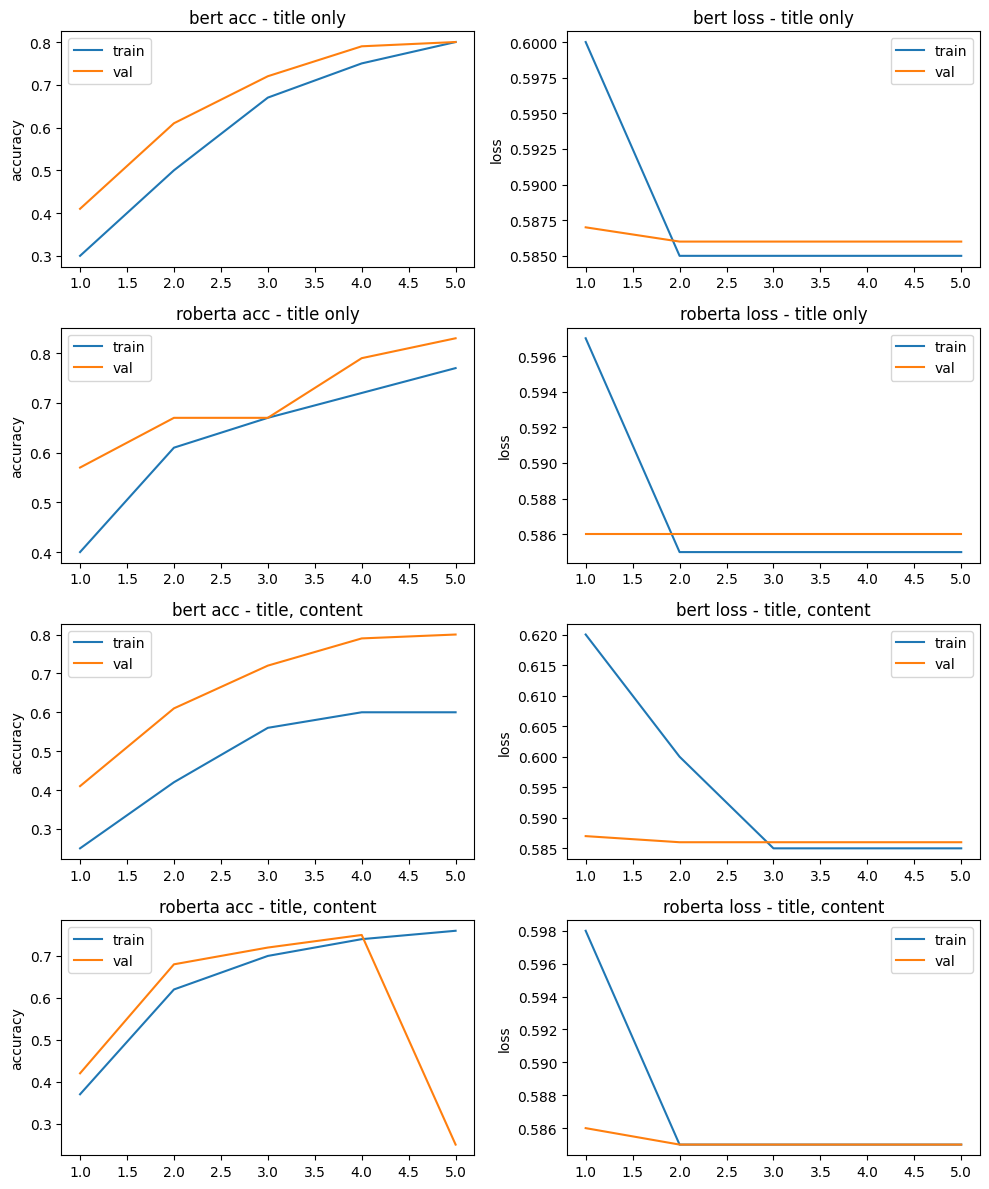

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data for the lineplots
epochs = [1,2,3,4,5]

"""
summary:
1 = Society & Culture
6 = Sports
5 = Computers & Internet
10 = Politics & Government

title only:
------------
train - 13,000
val - 1600
test - 1600

bert:
-----
1) no loss decrease after 2 epochs
2) train acc at 2 epochs - 0.50
3) val acc at 2 epochs - 0.61
4) test - 0.62

roberta:
---------
1) no loss decrease after 2 epochs
2) train acc at 2 epochs - 0.58
3) val acc at 2 epochs - 0.67
4) test - 0.667

so at title only level roberta was better with better test accuracy.

title and content only:
-----------------------
train - 12,000
val - 1500
test - 1500

bert:
-----
1) no loss decrease after 3 epochs
2) train acc at 3 epochs - 0.56
3) val acc at 3 epochs - 0.72
4) test - 0.72

roberta:
---------
1) no loss decrease after 2 epochs
2) train acc at 2 epochs - 0.62
3) val acc at 2 epochs - 0.68
4) test - 0.667

so at title and content level bert was better with 0.72 on testset.

Roberta with title and content is the best model
"""

bert_title_train_acc = [0.30, 0.50, 0.67, 0.75, 0.80]
bert_title_train_loss =  [0.60, 0.585, 0.585, 0.585, 0.585]
bert_title_val_acc = [0.41, 0.61, 0.72, 0.79, 0.80]
bert_title_val_loss = [0.587, 0.586, 0.586, 0.586, 0.586] 

roberta_title_train_acc = [0.40, 0.61, 0.67, 0.72, 0.77]
roberta_title_train_loss =  [0.597, 0.585, 0.585, 0.585, 0.585]
roberta_title_val_acc = [0.57, 0.67, 0.67, 0.79, 0.83]
roberta_title_val_loss = [0.586, 0.586, 0.586, 0.586, 0.586] 

bert_title_content_train_acc = [0.25, 0.42, 0.56, 0.60, 0.60]
bert_title_content_train_loss = [0.62, 0.60, 0.585, 0.585, 0.585]
bert_title_content_val_acc = [0.41, 0.61, 0.72, 0.79, 0.80]
bert_title_content_val_loss = [0.587, 0.586, 0.586, 0.586, 0.586]

roberta_title_content_train_acc = [0.37, 0.62, 0.70, 0.74, 0.76]
roberta_title_content_train_loss =  [0.598, 0.585, 0.585, 0.585, 0.585]
roberta_title_content_val_acc = [0.42, 0.68, 0.72, 0.75, 0.25]
roberta_title_content_val_loss = [0.586, 0.585, 0.585, 0.585, 0.585]

# Create the figure and subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))

# Plot the data on each subplot
axs[0,0].plot(epochs, bert_title_train_acc, label = 'train')
axs[0,1].plot(epochs, bert_title_train_loss, label = 'train')
axs[0,0].plot(epochs, bert_title_val_acc, label = 'val')
axs[0,1].plot(epochs, bert_title_val_loss, label = 'val')
axs[1,0].plot(epochs, roberta_title_train_acc, label = 'train')
axs[1,1].plot(epochs, roberta_title_train_loss, label = 'train')
axs[1,0].plot(epochs, roberta_title_val_acc, label = 'val')
axs[1,1].plot(epochs, roberta_title_val_loss, label = 'val')
axs[2,0].plot(epochs, bert_title_content_train_acc, label = 'train')
axs[2,1].plot(epochs, bert_title_content_train_loss, label = 'train')
axs[2,0].plot(epochs, bert_title_content_val_acc, label = 'val')
axs[2,1].plot(epochs, bert_title_content_val_loss, label = 'val')
axs[3,0].plot(epochs, roberta_title_content_train_acc, label = 'train')
axs[3,1].plot(epochs, roberta_title_content_train_loss, label = 'train')
axs[3,0].plot(epochs, roberta_title_content_val_acc, label = 'val')
axs[3,1].plot(epochs, roberta_title_content_val_loss, label = 'val')

# Add titles and labels
axs[0,0].set_title('bert acc - title only')
axs[0,1].set_title('bert loss - title only')
axs[1,0].set_title('roberta acc - title only')
axs[1,1].set_title('roberta loss - title only')
axs[2,0].set_title('bert acc - title, content')
axs[2,1].set_title('bert loss - title, content')
axs[3,0].set_title('roberta acc - title, content')
axs[3,1].set_title('roberta loss - title, content')

axs[0,0].set_ylabel('accuracy')
axs[1,0].set_ylabel('accuracy')
axs[2,0].set_ylabel('accuracy')
axs[3,0].set_ylabel('accuracy')
axs[0,1].set_ylabel('loss')
axs[1,1].set_ylabel('loss')
axs[2,1].set_ylabel('loss')
axs[3,1].set_ylabel('loss')


# Adjust the spacing between subplots
fig.tight_layout()
# axs.legend()
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[2,0].legend()
axs[2,1].legend()
axs[3,0].legend()
axs[3,1].legend()

# Show the plot
plt.show()


In [4]:
df = pd.read_csv("/content/drive/MyDrive/pro/8701/combined_14510_xlnet.csv")
title_only = df[(df['title_polyglot_detect'] == 'en') & (df['title_lang_detect'] == 'en') & (df['title_langid_detect'] == 'en') & (df['title_xl_detect'] == 'en')][['question_title', 'class_index']]

title_content = df[(df['title_polyglot_detect'] == 'en') & (df['title_lang_detect'] == 'en') & (df['title_langid_detect'] == 'en') & (df['title_xl_detect'] == 'en') & (df['content_polyglot_detect'] == 'en') & (df['content_lang_detect'] == 'en') & (df['content_langid_detect'] == 'en') & (df['content_xl_detect'] == 'en')][['question_title', 'question_content', 'class_index']]
title_content['title_content'] = title_content['question_title'] + " " +title_content['question_content']

In [5]:
np.random.seed(112)
df_train, df_val, df_test = np.split(title_only.sample(frac=1, random_state=42), 
                                     [int(.8*len(title_only)), int(.9*len(title_only))])

print(len(df_train),len(df_val), len(df_test)) #dataframes

13100 1637 1638


In [6]:
np.random.seed(112)
df_train_tc, df_val_tc, df_test_tc = np.split(title_content.sample(frac=1, random_state=42), 
                                     [int(.8*len(title_content)), int(.9*len(title_content))])

print(len(df_train_tc),len(df_val_tc), len(df_test_tc)) #dataframes

12026 1503 1504


In [7]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import BertModel, BertTokenizer
from transformers import RobertaModel, RobertaTokenizer

# specify GPU
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'


bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [44]:
import torch
import numpy as np

labels = {1: 0,
        5: 1,
        6: 2,
        10: 3
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df, tokenizer):

        self.labels = [labels[label] for label in df['class_index']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['question_title']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [29]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
bert = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased')
bert_tok = AutoTokenizer.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [30]:
bert.config.id2label = labels

In [42]:
from transformers_interpret import SequenceClassificationExplainer

sample_text = """
Stocks ended a choppy session mixed as investors digested a host of corporate earnings results and considered policymakers’ next moves to support the still virus-stricken economy.
The S&P 500 shook off earlier declines to narrowly eke out a record closing high.The Dow ended a tick below its recent record closing level."""
multiclass_explainer = SequenceClassificationExplainer(model=bert_model_title, tokenizer=bert_tok)

# call the exlplainer
word_attributions = multiclass_explainer(text=sample_text)

# seems to be an appropriate prediction
multiclass_explainer.predicted_class_name

AttributeError: ignored

In [33]:
word_attributions

[('[CLS]', 0.0),
 ('stocks', -0.32328831789587326),
 ('ended', 0.024550806438646666),
 ('a', -0.0026359866283336584),
 ('chop', 0.012226962702361557),
 ('##py', 0.11254587686570737),
 ('session', 0.04806492037740572),
 ('mixed', 0.06149272298098528),
 ('as', -0.021767808661559213),
 ('investors', -0.3317107595628184),
 ('digest', 0.1105991955851588),
 ('##ed', 0.16256040368873104),
 ('a', 0.048954438564134346),
 ('host', 0.0570569189419077),
 ('of', 0.053482384031560415),
 ('corporate', -0.004001664334511018),
 ('earnings', -0.14814112090262682),
 ('results', -0.024739343594685385),
 ('and', 0.11158163141579416),
 ('considered', 0.09296621035899766),
 ('policy', -0.06855685392614581),
 ('##makers', 0.05511994043463285),
 ('’', 0.1624481822463185),
 ('next', 0.05630521922514647),
 ('moves', 0.08931118572043525),
 ('to', 0.007259565579391259),
 ('support', 0.02213319578866804),
 ('the', 0.09794406623402034),
 ('still', 0.01572614967391837),
 ('virus', -0.11478185165188597),
 ('-', -0.063

In [40]:
multiclass_explainer.visualize()

KeyError: ignored

In [18]:
from torch import nn
from transformers import AutoModelForSequenceClassification

class BertClassifier(nn.Module):

    def __init__(self): #, dropout=0.5

        super(BertClassifier, self).__init__()

        self.bert = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased')
        # self.dropout = nn.Dropout(dropout)
        # self.linear = nn.Linear(768, 4)
        # self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
    #     dropout_output = self.dropout(pooled_output)
    #     linear_output = self.linear(dropout_output)
    #     final_layer = self.relu(linear_output)

        return pooled_output

In [9]:
from torch import nn

class RoBertaClassifier(nn.Module):

    def __init__(self): #, dropout=0.5

        super(RoBertaClassifier, self).__init__()

        self.roberta = RobertaModel.from_pretrained('roberta-base')
        # self.dropout = nn.Dropout(dropout)
        # self.linear = nn.Linear(768, 4)
        # self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.roberta(input_ids= input_id, attention_mask=mask,return_dict=False)
    #     dropout_output = self.dropout(pooled_output)
    #     linear_output = self.linear(dropout_output)
    #     final_layer = self.relu(linear_output)

        return pooled_output

In [37]:
def evaluate(model, test_data, tokenizer):

    test = Dataset(test_data, tokenizer)
    pred_label = []
    test_dataloader = torch.utils.data.DataLoader(test, batch_size=8)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)
              pred = output.argmax(dim=1)
              # print(pred)
              # print(test_label)
              # pred_label.append(pred)
              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
              # print(pred.tolist())
              pred_label.append(pred.tolist())
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    flat_list = [item for sublist in pred_label for item in sublist]
    return flat_list

In [11]:
bert_pretrained = BertModel.from_pretrained('bert-base-uncased')
roberta_pretrained = RobertaModel.from_pretrained('roberta-base')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [45]:
Dataset(df_test, bert_tokenizer)

In [65]:
weights = torch.load(path)
# bert_model_title.load_state_dict(weights)
bert_model_title.load_state_dict(torch.load(path, map_location="cuda"), strict=False)

_IncompatibleKeys(missing_keys=['bert.bert.embeddings.position_ids', 'bert.bert.embeddings.word_embeddings.weight', 'bert.bert.embeddings.position_embeddings.weight', 'bert.bert.embeddings.token_type_embeddings.weight', 'bert.bert.embeddings.LayerNorm.weight', 'bert.bert.embeddings.LayerNorm.bias', 'bert.bert.encoder.layer.0.attention.self.query.weight', 'bert.bert.encoder.layer.0.attention.self.query.bias', 'bert.bert.encoder.layer.0.attention.self.key.weight', 'bert.bert.encoder.layer.0.attention.self.key.bias', 'bert.bert.encoder.layer.0.attention.self.value.weight', 'bert.bert.encoder.layer.0.attention.self.value.bias', 'bert.bert.encoder.layer.0.attention.output.dense.weight', 'bert.bert.encoder.layer.0.attention.output.dense.bias', 'bert.bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.bert.encoder.layer.0.intermediate.dense.weight', 'bert.bert.encoder.layer.0.intermediate.dense.bias', 'bert.bert.encoder.l

In [59]:
cp

OrderedDict([('bert.embeddings.position_ids',
              tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
                        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
                        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
                        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
                        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
                        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
                        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
                        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
                       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
                       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
                       1

In [57]:
# cp['model_state_dict']
# cp.keys()


KeyError: ignored

In [66]:
path = '/content/drive/MyDrive/pro/8701/bert_model/saved_weights_1.pt'
# model_state= torch.load(path)
# bert_model_title = torch.load(path)
bert_model_title.load_state_dict(torch.load(path, map_location="cuda"), strict=False)
evaluate(bert_model_title, df_test[:1], bert_tokenizer)
# bert_model_title.to("gpu")

ValueError: ignored

In [19]:
#load weights of best model
bert_model_title = BertClassifier()
bert_model_title.bert.config.id2label = {
        1: 0,
        5: 1,
        6: 2,
        10: 3
}

path = '/content/drive/MyDrive/pro/8701/bert_model/saved_weights_1.pt'
bert_model_title.load_state_dict(torch.load(path))

#0.62
bert_title_preds = evaluate(bert_model_title, df_test, bert_tokenizer)
len(bert_title_preds)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

AttributeError: ignored

In [14]:
#load weights of best model
roberta_model_title = RoBertaClassifier()
path = '/content/drive/MyDrive/pro/8701/roberta_model/saved_weights_1.pt'
roberta_model_title.load_state_dict(torch.load(path))

#0.667
roberta_title_preds = evaluate(roberta_model_title, df_test, roberta_tokenizer)
# evaluate(model_test, df_train.iloc[:10])

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Test Accuracy:  0.667


In [15]:
#load weights of best model
bert_model_tc = BertClassifier()
path = '/content/drive/MyDrive/pro/8701/bert_model/saved_weights_2.pt'
bert_model_tc.load_state_dict(torch.load(path))

bert_tc_preds = evaluate(bert_model_tc, df_test, bert_tokenizer)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Test Accuracy:  0.722


In [16]:
#load weights of best model
roberta_model_tc = RoBertaClassifier()
path = '/content/drive/MyDrive/pro/8701/roberta_model/saved_weights_1.pt'
roberta_model_tc.load_state_dict(torch.load(path))

roberta_tc_preds = evaluate(roberta_model_tc, df_test, roberta_tokenizer)
# evaluate(model_test, df_train.iloc[:10])

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Test Accuracy:  0.667


In [51]:
df_test = df_test.reset_index(drop = True)
# df_test.head()
id2label = {
    0 : 1,
    1:5,
    2:6,
    3:10
}


df_test['bert_title'] = [id2label[label] for label in bert_title_preds] 
df_test['roberta_title'] = [id2label[label] for label in roberta_title_preds]
df_test['bert_tc'] = [id2label[label] for label in bert_tc_preds]
df_test['roberta_tc'] = [id2label[label] for label in roberta_tc_preds]
df_test.head()

,question_title,class_index,bert_title,roberta_title,bert_tc,roberta_tc
0,if we are supposed to have faith that god will...,1,10,10,1,10
1,at what point in american history did society ...,1,10,10,10,10
2,my computer is running really weird?,5,5,5,5,5
3,how can i browse a copy of the registry from a...,5,5,5,5,5
4,where can i fetch a nice girl to have an e mai...,1,10,10,10,10


In [52]:
df_test['class_index'].value_counts()

10    480
1     409
5     400
6     349
Name: class_index, dtype: int64

In [53]:
print(np.sum(df_test['class_index'] == df_test['bert_title'])/len(df_test))
print(np.sum(df_test['class_index'] == df_test['roberta_title'])/len(df_test))
print(np.sum(df_test['class_index'] == df_test['bert_tc'])/len(df_test))
print(np.sum(df_test['class_index'] == df_test['roberta_tc'])/len(df_test))

0.6282051282051282
0.6672771672771672
0.7216117216117216
0.6672771672771672


In [54]:
for i in [1, 5, 6, 10]:
  temp = df_test[df_test['class_index'] == i ]
  print(temp.shape)

  print("On class = " + str(i))
  print("Bert title = ")
  evaluate(bert_model_title, temp, bert_tokenizer)
  print("RoBerta title = ")
  evaluate(roberta_model_title, temp, roberta_tokenizer)
  print("Bert title content = ")
  evaluate(bert_model_tc, temp, bert_tokenizer)
  print("RoBerta title content = ")
  evaluate(roberta_model_tc, temp, roberta_tokenizer)

(409, 6)
On class = 1
Bert title = 
Test Accuracy:  0.296
RoBerta title = 
Test Accuracy:  0.056
Bert title content = 
Test Accuracy:  0.403
RoBerta title content = 
Test Accuracy:  0.056
(400, 6)
On class = 5
Bert title = 
Test Accuracy:  0.495
RoBerta title = 
Test Accuracy:  0.835
Bert title content = 
Test Accuracy:  0.700
RoBerta title content = 
Test Accuracy:  0.835
(349, 6)
On class = 6
Bert title = 
Test Accuracy:  0.716
RoBerta title = 
Test Accuracy:  0.819
Bert title content = 
Test Accuracy:  0.848
RoBerta title content = 
Test Accuracy:  0.819
(480, 6)
On class = 10
Bert title = 
Test Accuracy:  0.958
RoBerta title = 
Test Accuracy:  0.938
Bert title content = 
Test Accuracy:  0.919
RoBerta title content = 
Test Accuracy:  0.938


In [55]:
df_test[df_test['class_index'] == 1]['bert_title'].value_counts()

10    270
1     121
6      18
Name: bert_title, dtype: int64

In [56]:
df_test[df_test['class_index'] == 1]['roberta_title'].value_counts()

10    351
6      25
1      23
5      10
Name: roberta_title, dtype: int64

In [57]:
df_test[df_test['class_index'] == 1]['bert_tc'].value_counts()

10    210
1     165
6      32
5       2
Name: bert_tc, dtype: int64

In [58]:
df_test[df_test['class_index'] == 1]['roberta_tc'].value_counts()

10    351
6      25
1      23
5      10
Name: roberta_tc, dtype: int64

In [66]:
##F1 SCORE FOR ALL THE 4 MODELS WRT GROUND TRUTH
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

In [60]:
df_test['bert_title'].value_counts()

10    1016
6      281
5      199
1      142
Name: bert_title, dtype: int64

In [61]:
df_test['roberta_title'].value_counts()

10    898
5     368
6     347
1      25
Name: roberta_title, dtype: int64

In [62]:
df_test['bert_tc'].value_counts()

10    798
6     352
5     287
1     201
Name: bert_tc, dtype: int64

In [63]:
df_test['roberta_tc'].value_counts()

10    898
5     368
6     347
1      25
Name: roberta_tc, dtype: int64

In [64]:
df_test.head()

,question_title,class_index,bert_title,roberta_title,bert_tc,roberta_tc
0,if we are supposed to have faith that god will...,1,10,10,1,10
1,at what point in american history did society ...,1,10,10,10,10
2,my computer is running really weird?,5,5,5,5,5
3,how can i browse a copy of the registry from a...,5,5,5,5,5
4,where can i fetch a nice girl to have an e mai...,1,10,10,10,10


array([0.85211268, 0.99497487, 0.88967972, 0.45275591])

In [68]:
prec_bt = precision_score(df_test['class_index'], df_test['bert_title'], average=None)

# Recall
rec_bt = recall_score(df_test['class_index'], df_test['bert_title'], average=None)

# F1-Score
f1_bt = f1_score(df_test['class_index'], df_test['bert_title'], average=None)

prec_bt, rec_bt, f1_bt

(array([0.85211268, 0.99497487, 0.88967972, 0.45275591]),
 array([0.29584352, 0.495     , 0.71633238, 0.95833333]),
 array([0.43920145, 0.66110184, 0.79365079, 0.61497326]))

In [69]:
prec_rbt = precision_score(df_test['class_index'], df_test['roberta_title'], average=None)

# Recall
rec_rbt = recall_score(df_test['class_index'], df_test['roberta_title'], average=None)

# F1-Score
f1_rbt = f1_score(df_test['class_index'], df_test['roberta_title'], average=None)

prec_rbt, rec_rbt, f1_rbt

(array([0.92      , 0.9076087 , 0.82420749, 0.50111359]),
 array([0.05623472, 0.835     , 0.81948424, 0.9375    ]),
 array([0.10599078, 0.86979167, 0.82183908, 0.65312046]))

In [70]:
prec_btc = precision_score(df_test['class_index'], df_test['bert_tc'], average=None)

# Recall
rec_btc = recall_score(df_test['class_index'], df_test['bert_tc'], average=None)

# F1-Score
f1_btc = f1_score(df_test['class_index'], df_test['bert_tc'], average=None)

prec_btc, rec_btc, f1_btc

(array([0.82089552, 0.97560976, 0.84090909, 0.55263158]),
 array([0.40342298, 0.7       , 0.84813754, 0.91875   ]),
 array([0.54098361, 0.81513828, 0.84450785, 0.69014085]))

In [71]:
prec_btc = precision_score(df_test['class_index'], df_test['roberta_tc'], average=None)

# Recall
rec_btc = recall_score(df_test['class_index'], df_test['roberta_tc'], average=None)

# F1-Score
f1_btc = f1_score(df_test['class_index'], df_test['roberta_tc'], average=None)

prec_btc, rec_btc, f1_btc

(array([0.92      , 0.9076087 , 0.82420749, 0.50111359]),
 array([0.05623472, 0.835     , 0.81948424, 0.9375    ]),
 array([0.10599078, 0.86979167, 0.82183908, 0.65312046]))

In [72]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 25.0 MB/s eta 0:00:00


In [80]:
# explain the model on two sample inputs
import shap
import scipy as sp
!pip install nlp
import nlp

explainer = shap.Explainer(bert_model_title)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 11.8 MB/s eta 0:00:00


In [86]:
!pip install transformers-interpret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.7 MB/s eta 0:00:00


In [119]:
i = roberta_tokenizer("I love you, I like you",padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt")['input_ids'].to(device)
m = roberta_tokenizer("I love you, I like you",padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt")['attention_mask'].squeeze(1).to(device)

output = roberta_model_tc(i, m).to(device)
# pred = output.argmax(dim=1)
# pred.item()
output.argmax(dim=1)

tensor([0], device='cuda:0')

In [159]:
# load a transformers pipeline model
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# explain the model on two sample inputs
explainer = shap.Explainer(model)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
`return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.


In [161]:
#explainer = shap.Explainer(model) 
shap_values = explainer(["Its the best cup of tea I ever had! despite its bad taste"])

# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "POSITIVE"])

  0%|          | 0/240 [00:00<?, ?it/s]

Partition explainer: 2it [00:20, 20.06s/it]               


In [156]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="bert-base-uncased", device=0)

text = "The new tax policy will have a significant impact on the middle class."
labels = ["politics", "not politics"]

result = classifier(text, labels)

print(f"Text: {text}")
print(f"Is political? {result['scores'][0] > result['scores'][1]}")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Text: The new tax policy will have a significant impact on the middle class.
Is political? True


In [157]:
explainer = shap.Explainer(classifier)
#explainer = shap.Explainer(model) 
shap_values = explainer(["I love Burundian coffee! let's #Visit Burundi."])

# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "Political"])

TypeError: ignored

In [164]:
title_content['question_title']

1    my town is having rev trask day next week. do ...
2                             why are people so dumb ?
3                  are all christians going to heaven?
5    if a womans nipples are showing through her sh...
6    three metal tall crosses roadside 2white, 1yel...
Name: question_title, dtype: object

In [178]:
tc_len = list(title_content['title_content'].apply(lambda x: len(x)))
tc_1, tc_5, tc_6, tc_10 = tc_len[:5000], tc_len[5000:10000], tc_len[10000:15000], tc_len[15000:]

In [183]:
sum(tc_1)/len(tc_1), sum(tc_5)/len(tc_5), sum(tc_6)/len(tc_6), sum(tc_10)/len(tc_10)

(325.4384, 306.6176, 232.4606, 260.1818181818182)

<BarContainer object of 4 artists>

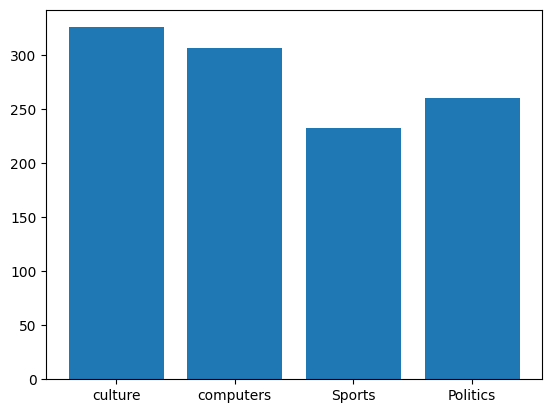

In [184]:
classes = ['culture', 'computers', 'Sports', 'Politics']
lens = [sum(tc_1)/len(tc_1), sum(tc_5)/len(tc_5), sum(tc_6)/len(tc_6), sum(tc_10)/len(tc_10)]

plt.bar(classes, lens)

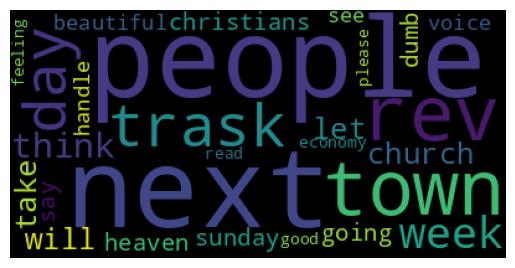

In [173]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '

text = title_content[title_content['class_index'] == 1]['question_title'].values 

wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

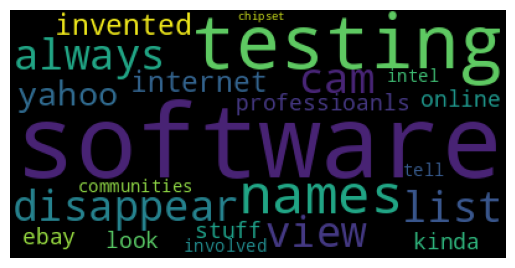

In [172]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '

text = title_content[title_content['class_index'] == 5]['question_title'].values 

wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

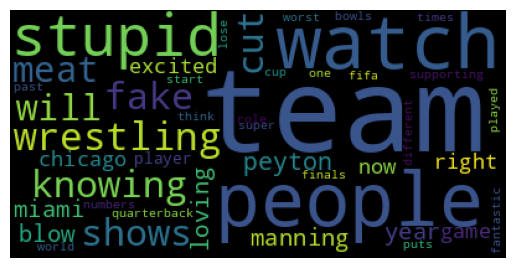

In [171]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '

text = title_content[title_content['class_index'] == 6]['question_title'].values 

wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

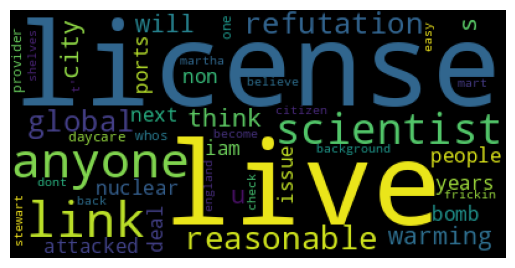

In [170]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '

text = title_content[title_content['class_index'] == 10]['question_title'].values 

wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()